### ECONOMETRICS METHODOLOGY

##### PROJECT-GOAL
* The aim of this project is to identify the features of the California Housing Prrice to Vary


In [1]:
## importing neccessary libraries   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import sketch
from scipy.stats import stats
import statsmodels.api as sm 
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor , reset_ramsey
from sklearn.linear_model  import Ridge, Lasso,LinearRegression,RidgeCV,LassoCV
from xgboost import XGBRFRegressor
from sklearn.metrics import root_mean_squared_error ,mean_absolute_percentage_error
from sklearn.preprocessing import PowerTransformer 
from sklearn.model_selection import train_test_split 
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['figure.dpi'] = 400
sns.set_style("darkgrid")




In [2]:
## lading the data  
data = data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\New folder\archive\housing.csv")
## display the first five items  
data.sketch.ask(
    "Can you create a detailed data dictionary mapping each column name to its description "
    "for the California Housing dataset? Please include the following details for each column: "
    "1. Column name, 2. Data type, 3. Description of the column, 4. Example values. "
    "Format the output as an HTML list with a title in bold and underlined: "
    "'Dataset Description of California Housing Dataset'. "
    "Increase the font size slightly for better readability."
)

### DATA-PREPROCESSSING

In [4]:
## last five  
data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [5]:
## checking for the shape of the data  
data.shape

(20640, 10)

In [6]:
## checking for general info  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
## checking for column names  
data.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [8]:
## checking for missing value counts
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
## checking for percentage of missing variables  
data.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [10]:
## Imputation Strategy (Median Imputation)
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())
## checking for the percentage of missing values again  
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
## ddealing with duplicates  
data.duplicated(keep='first').sum()

0

#### EXPLORATORY-DATA-ANALYSIS

In [13]:
## checking for descriptive statistics  
data.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20640.0     536.838857     419.391878      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         297.0000     435.0000     643.25000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [14]:
## longititude has negative values , lets check if these are errors or part of the data 
(np.sum(data['longitude']<0)/len(data))*100 

100.0

#### DATASET-DISTRIBUTIONS

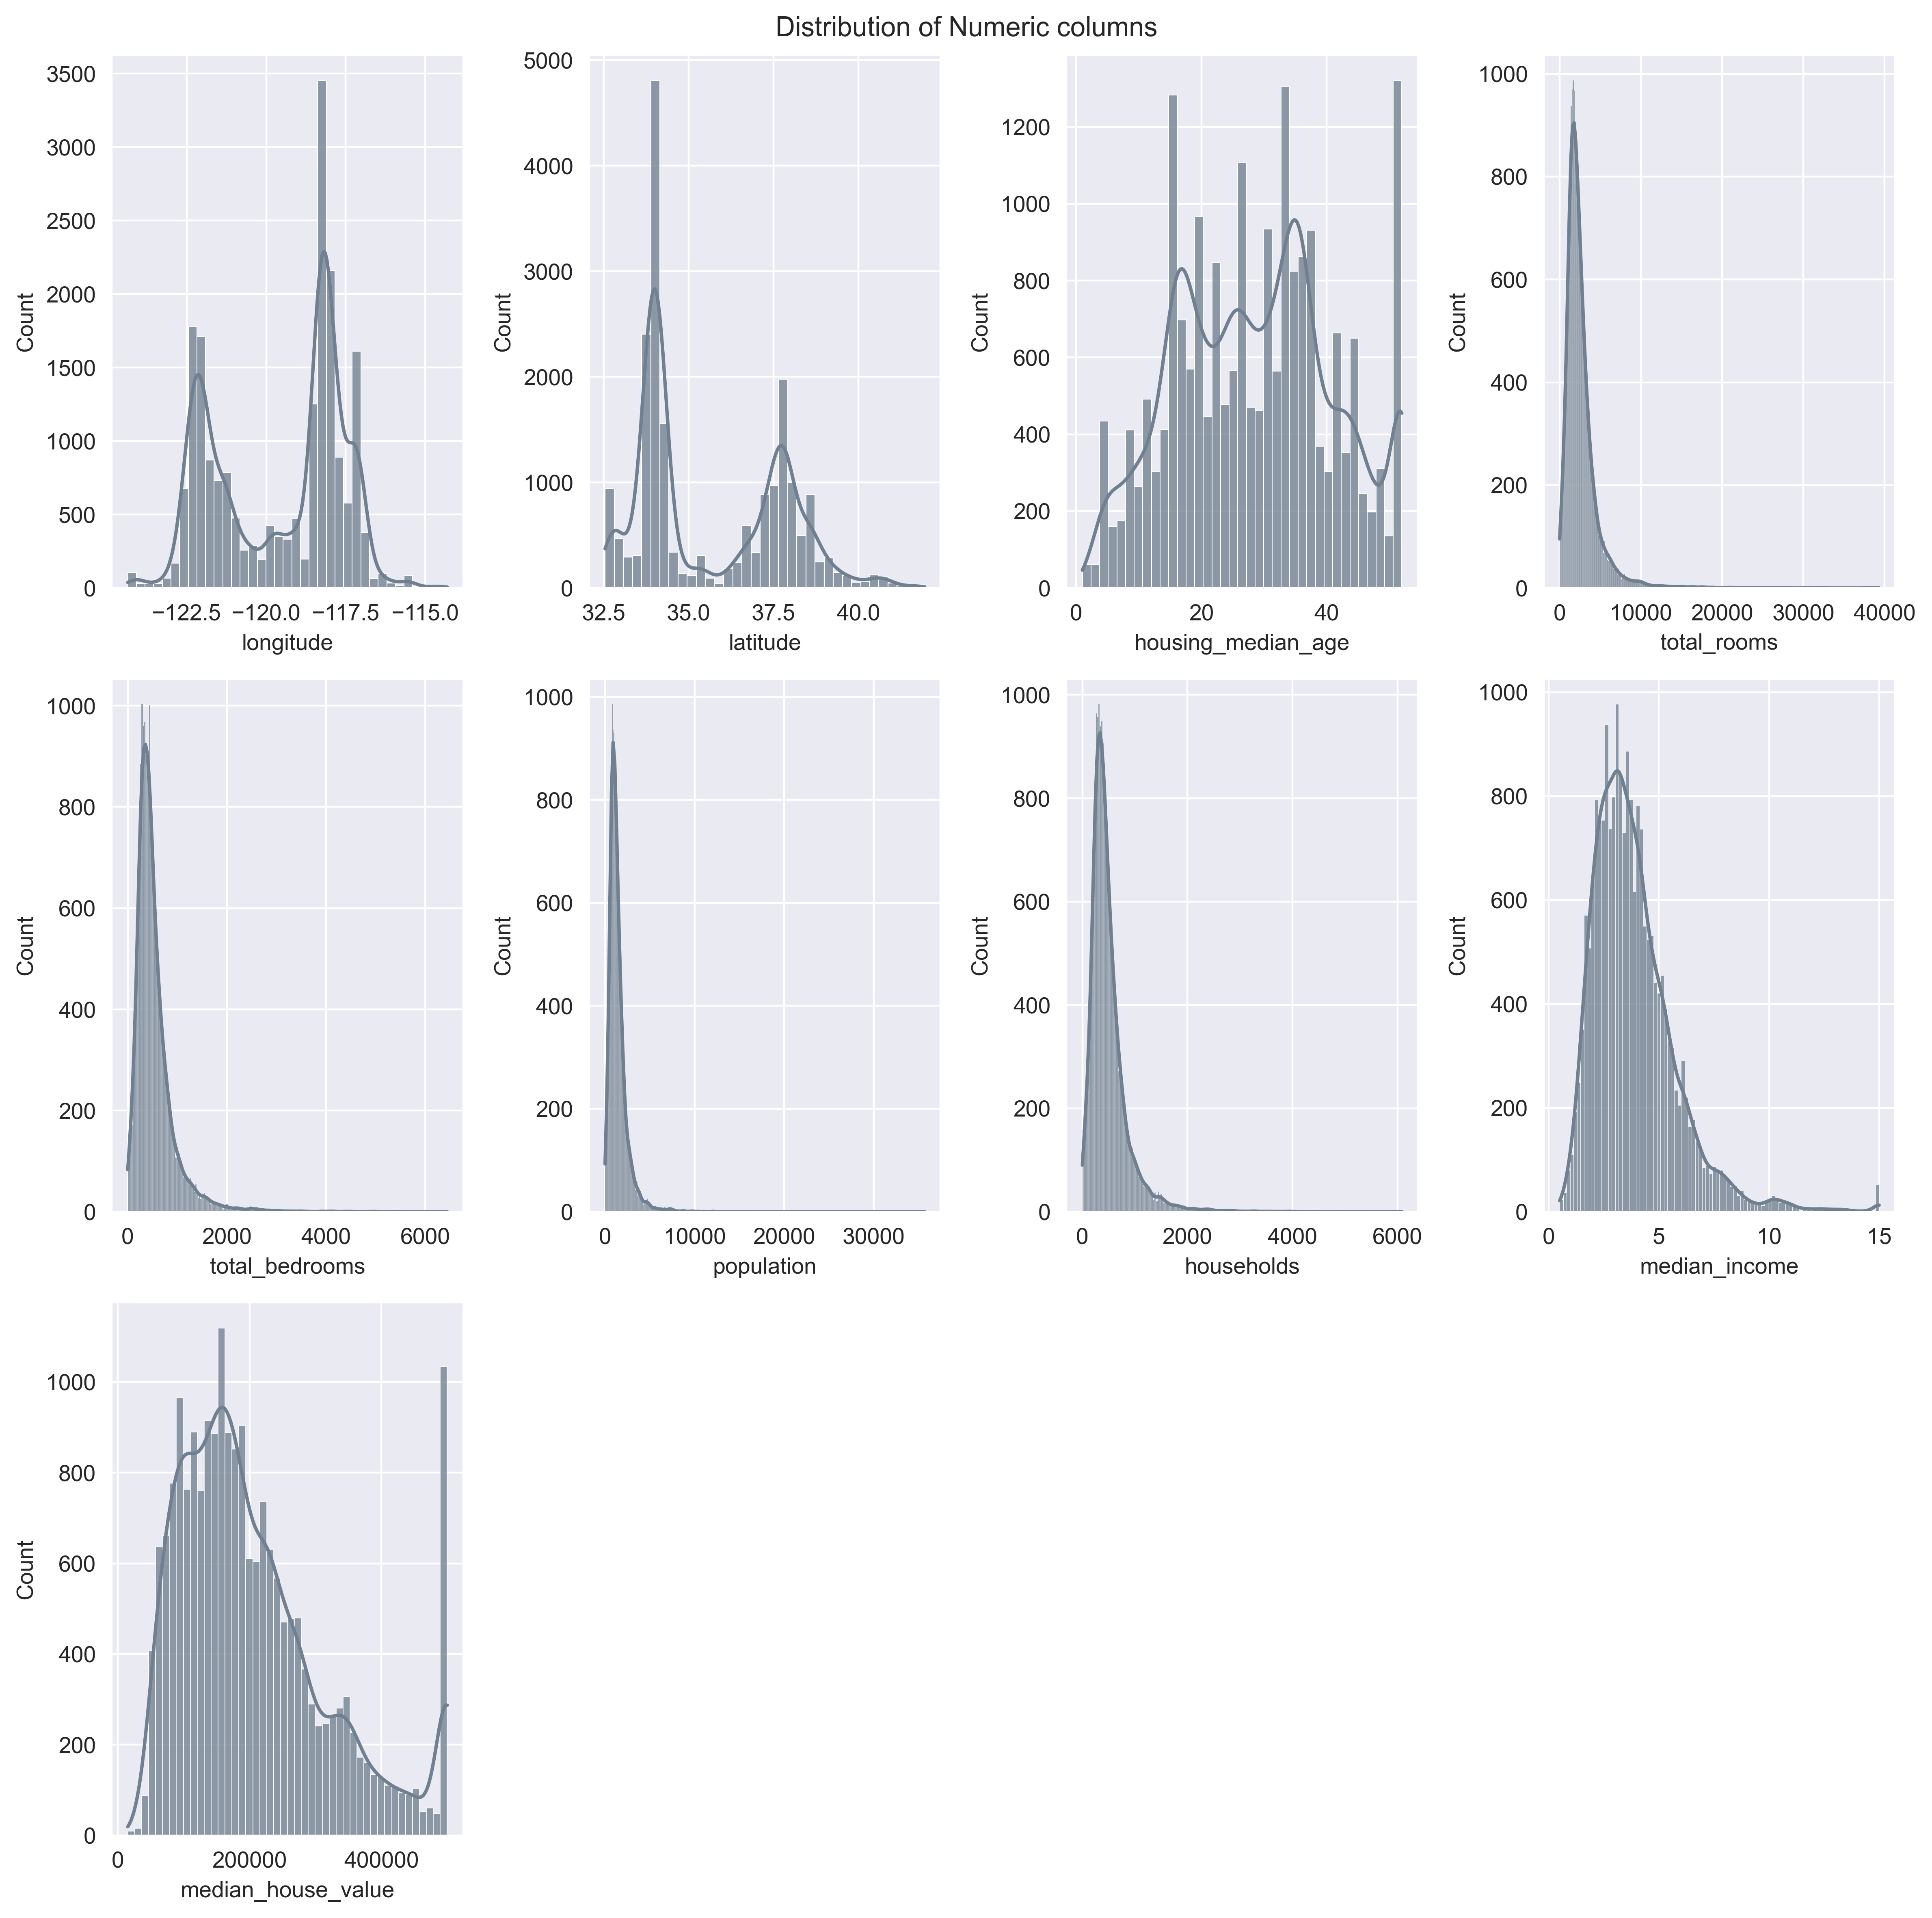

In [16]:
## creating a list of numeriic clumns  
numeric_clumns = data.select_dtypes(include=['float','int']).columns.to_list()
## defininh the number of ncols  
n_cols = 4 
## defining how many rows are needed to fit 4 columns  
n_rows = int(np.ceil(len(numeric_clumns)/ n_cols))  
## creating the figure 
fig , axes = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(12,12))
## flattening the axes  
axes = axes.flatten()
## loop through
for i , column in enumerate(numeric_clumns):  
    sns.histplot(data=data,x=column,ax=axes[i],kde=True,color='#708090',alpha=0.78)
    # axes[i].set_title(f'{column} Distribution')
    plt.suptitle("Distribution of Numeric columns",fontsize=12)
    axes[i].set_ylabel(f'Count')
    axes[i].set_xlabel(column)
for j in range(i+1,n_rows*n_cols):  
    axes[j].axis('off')
## adjusting the subplots  
plt.tight_layout()
plt.show()


#### BOX-PLOTS

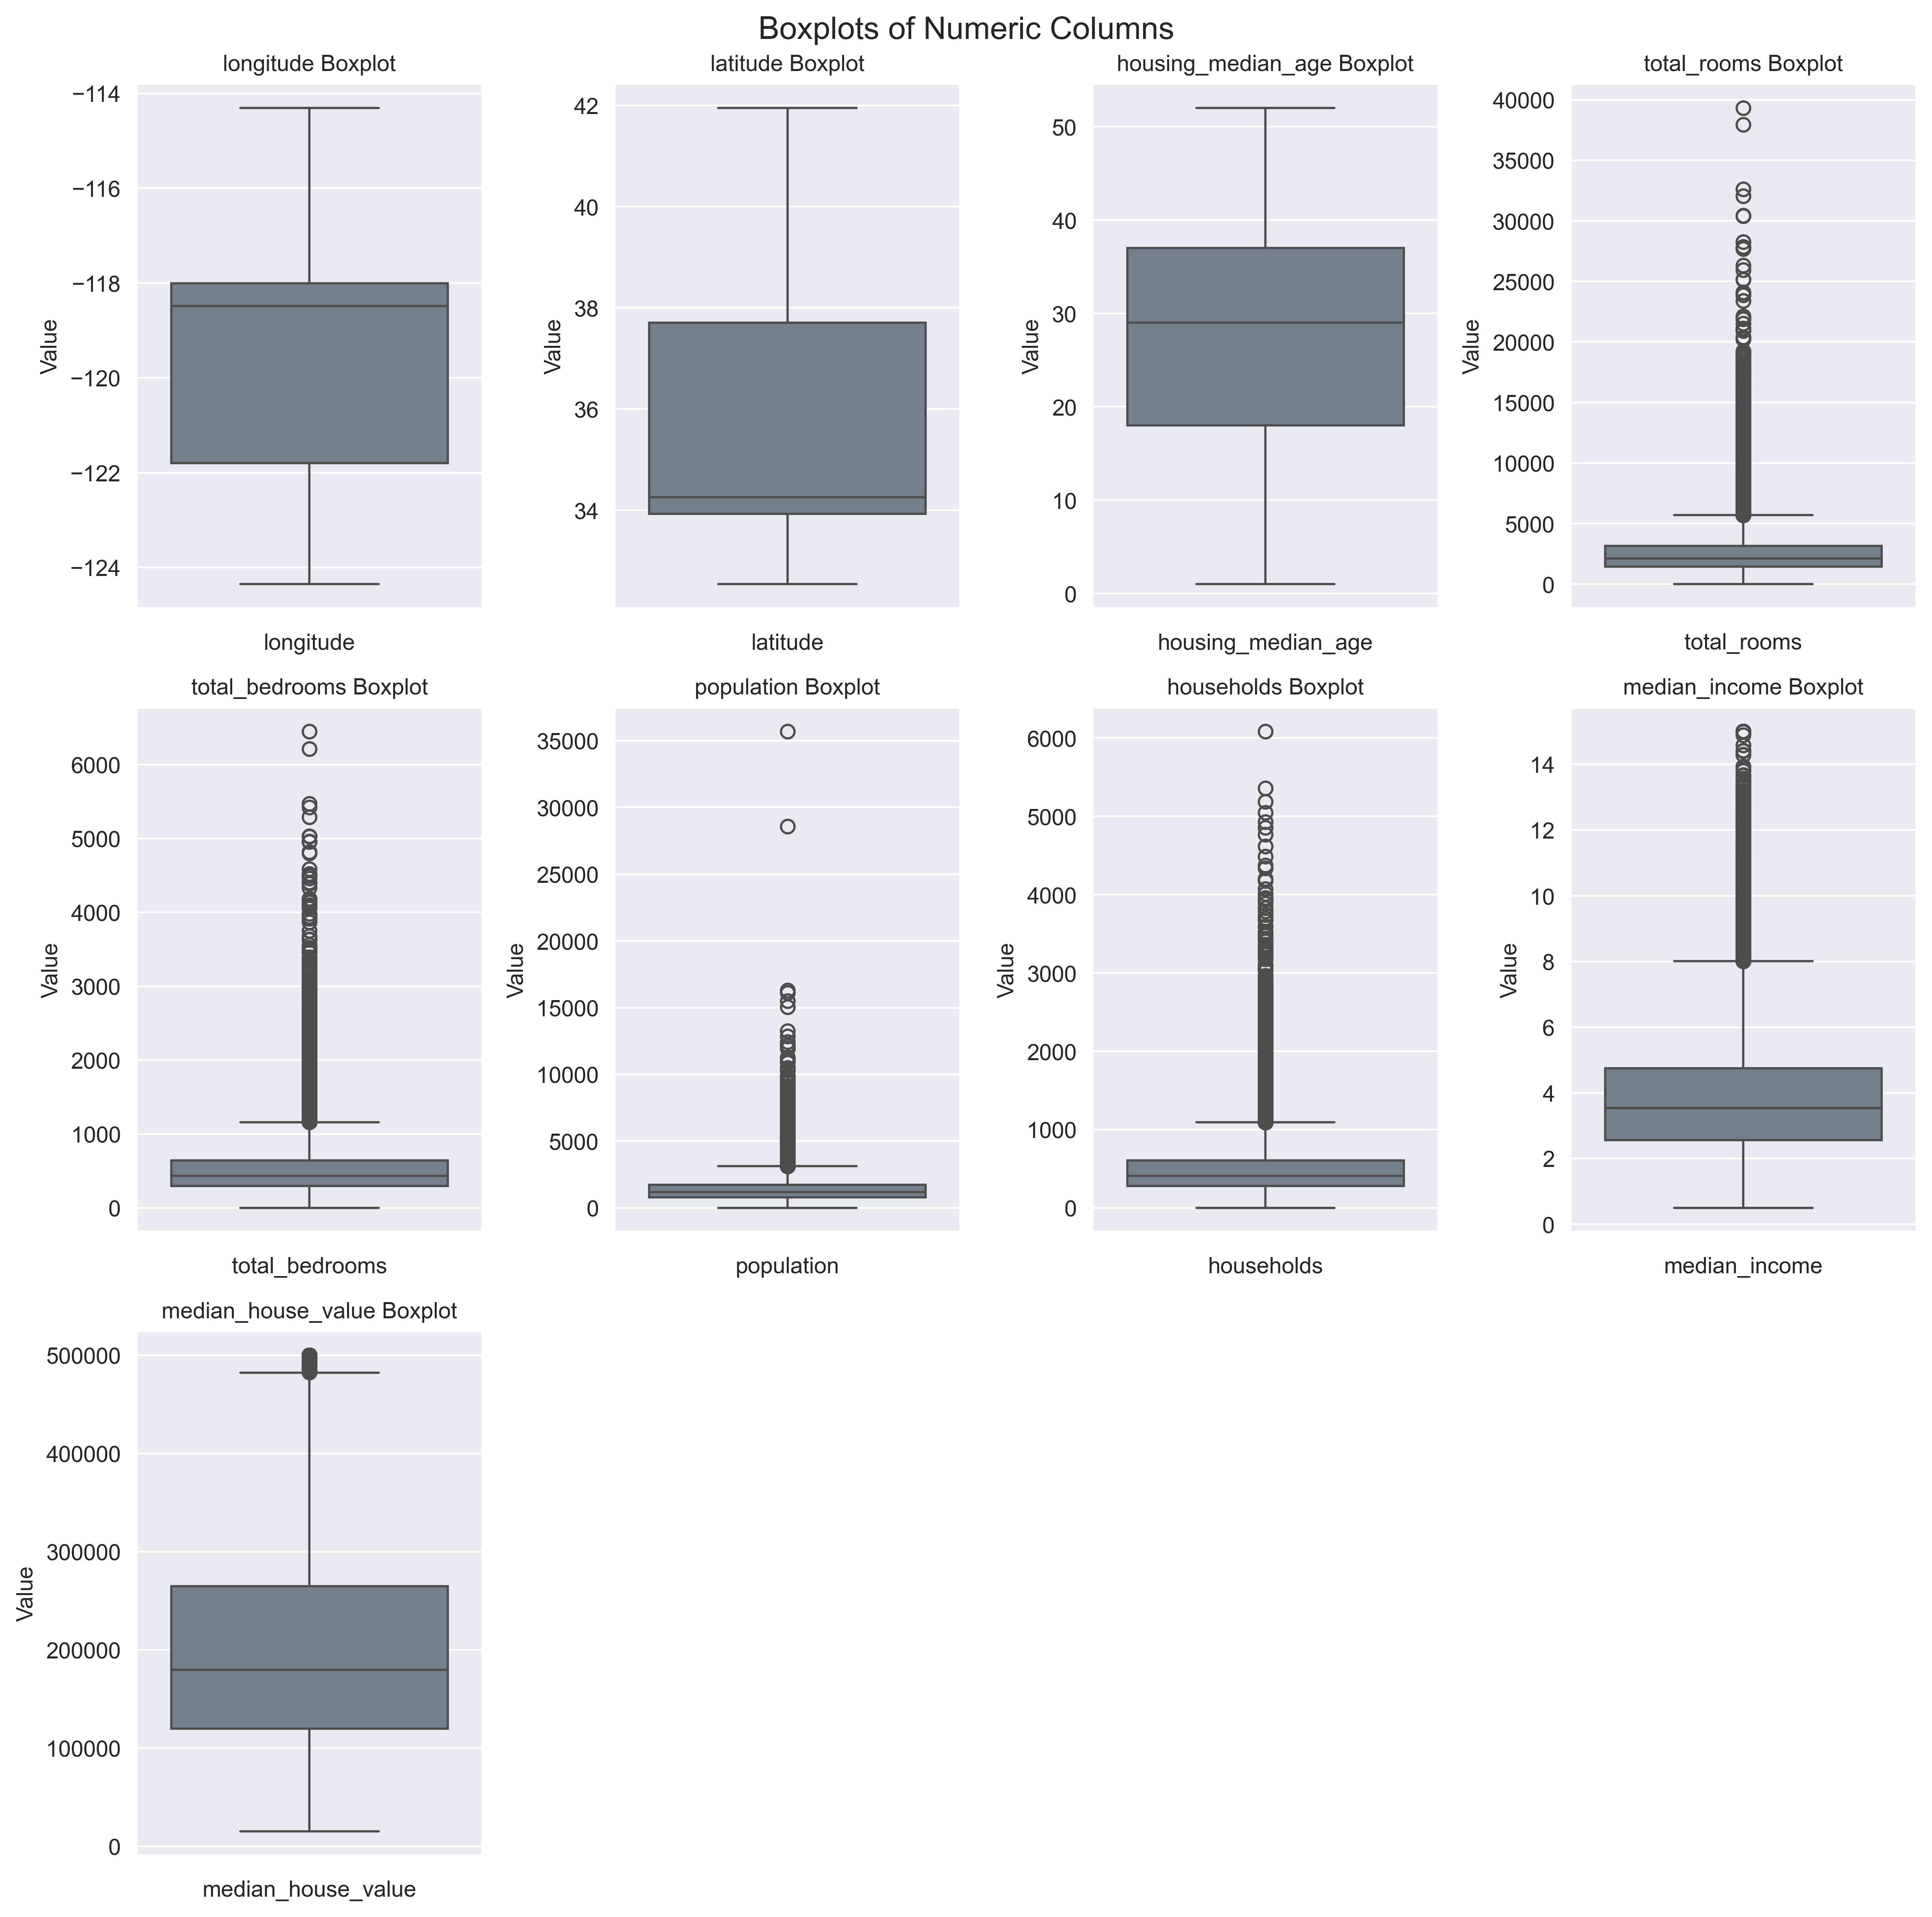

In [18]:

# Creating a list of numeric columns
numeric_columns = data.select_dtypes(include=['float', 'int']).columns.to_list()

# Defining the number of columns for the subplot grid
n_cols = 4

# Calculating the number of rows needed to fit all numeric columns
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Creating the figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Looping through each numeric column and creating a boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=data[column], ax=axes[i], color='#708090',saturation=0.78)
    axes[i].set_title(f'{column} Boxplot', fontsize=10)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Turn off any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

# Adding an overall title and adjusting the layout
plt.suptitle("Boxplots of Numeric Columns", fontsize=14)
plt.tight_layout()
plt.show()


In [19]:

def outlier_detection(data, column):
    ## Define the quartiles
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    ## Calculate IQR
    IQR = q3 - q1
    ## Define bounds
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    ## Flag outliers
    data['outliers_classes'] = np.where(
        data[column] < lower_bound, -1, 
        np.where(
            data[column] > upper_bound, -1,
            1  
        )
    )
    
    return data

In [20]:
## calling the function   
outlier_detection(data=data,column='median_house_value')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  outliers_classes  
0            NEAR BAY                 1  
1            NEAR BAY                 1  
2            NEAR BAY                 1  
3            NEAR BAY                 1  
4            NEAR BAY                 1  
...               ...               ...  
20635          INLAND                 1  
20636          INLAND                 1  
20637          INLAND                 1  
20638          INLAND                 1  
20639          INLAND                 1  

[20640 rows x 11 columns]

In [21]:
## checking for the counts of missing values  
data['outliers_classes'].value_counts(normalize=True)

outliers_classes
 1    0.94811
-1    0.05189
Name: proportion, dtype: float64

#### CATEGORICAL-DISTRIBUTIONS

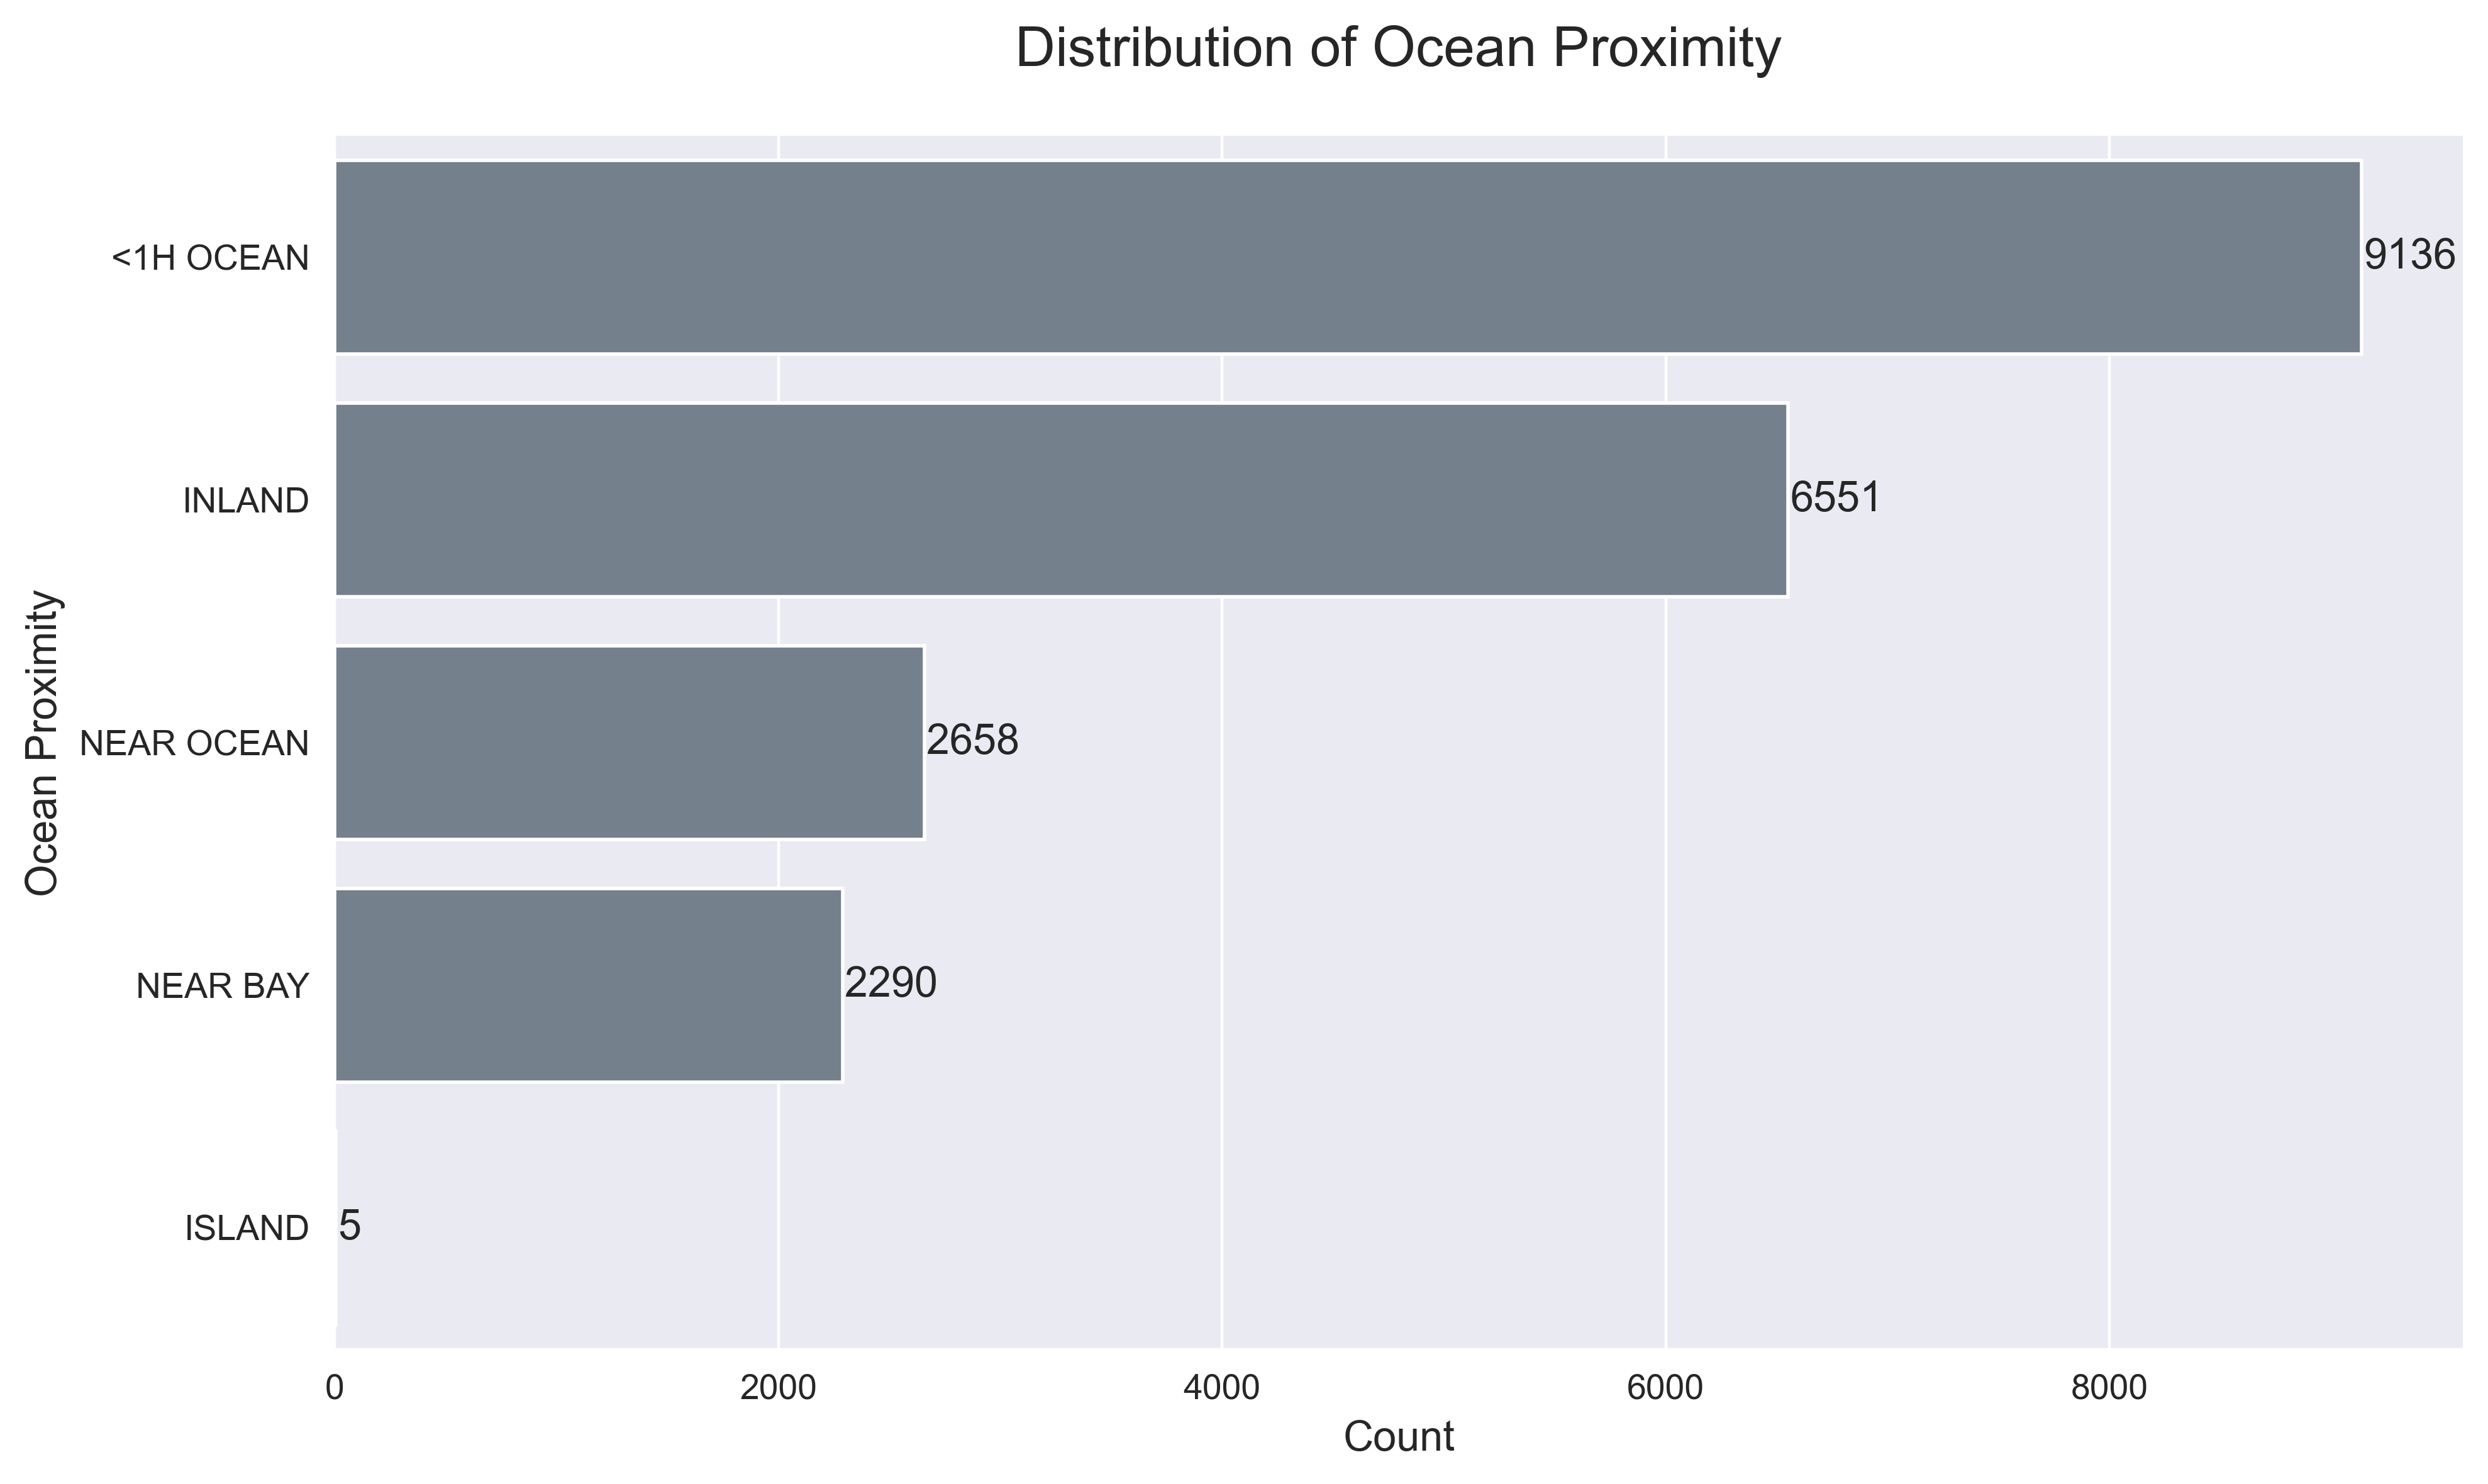

In [23]:

# Set figure size
plt.figure(figsize=(10, 6))

# Create countplot
ax = sns.countplot(
    data=data,
    y='ocean_proximity',  # Use column name directly
    color='#708090',  # Bar color
    saturation=0.75,  # Adjust saturation for better appearance
    order=data['ocean_proximity'].value_counts().index  # Sort by frequency
)

# Add title and labels
plt.title('Distribution of Ocean Proximity', fontsize=16, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Ocean Proximity', fontsize=12)

# Add annotations (counts) on the bars
for p in ax.patches:
    width = p.get_width() 
    plt.text(
        width + 10,
        p.get_y() + p.get_height() / 2, 
        f'{int(width)}', 
        va='center',  
        fontsize=12
    )

# Remove spines for a cleaner look
sns.despine(left=True)

# Show plot
plt.tight_layout()
plt.show()

#### TARGET DISTRIBUTIONS

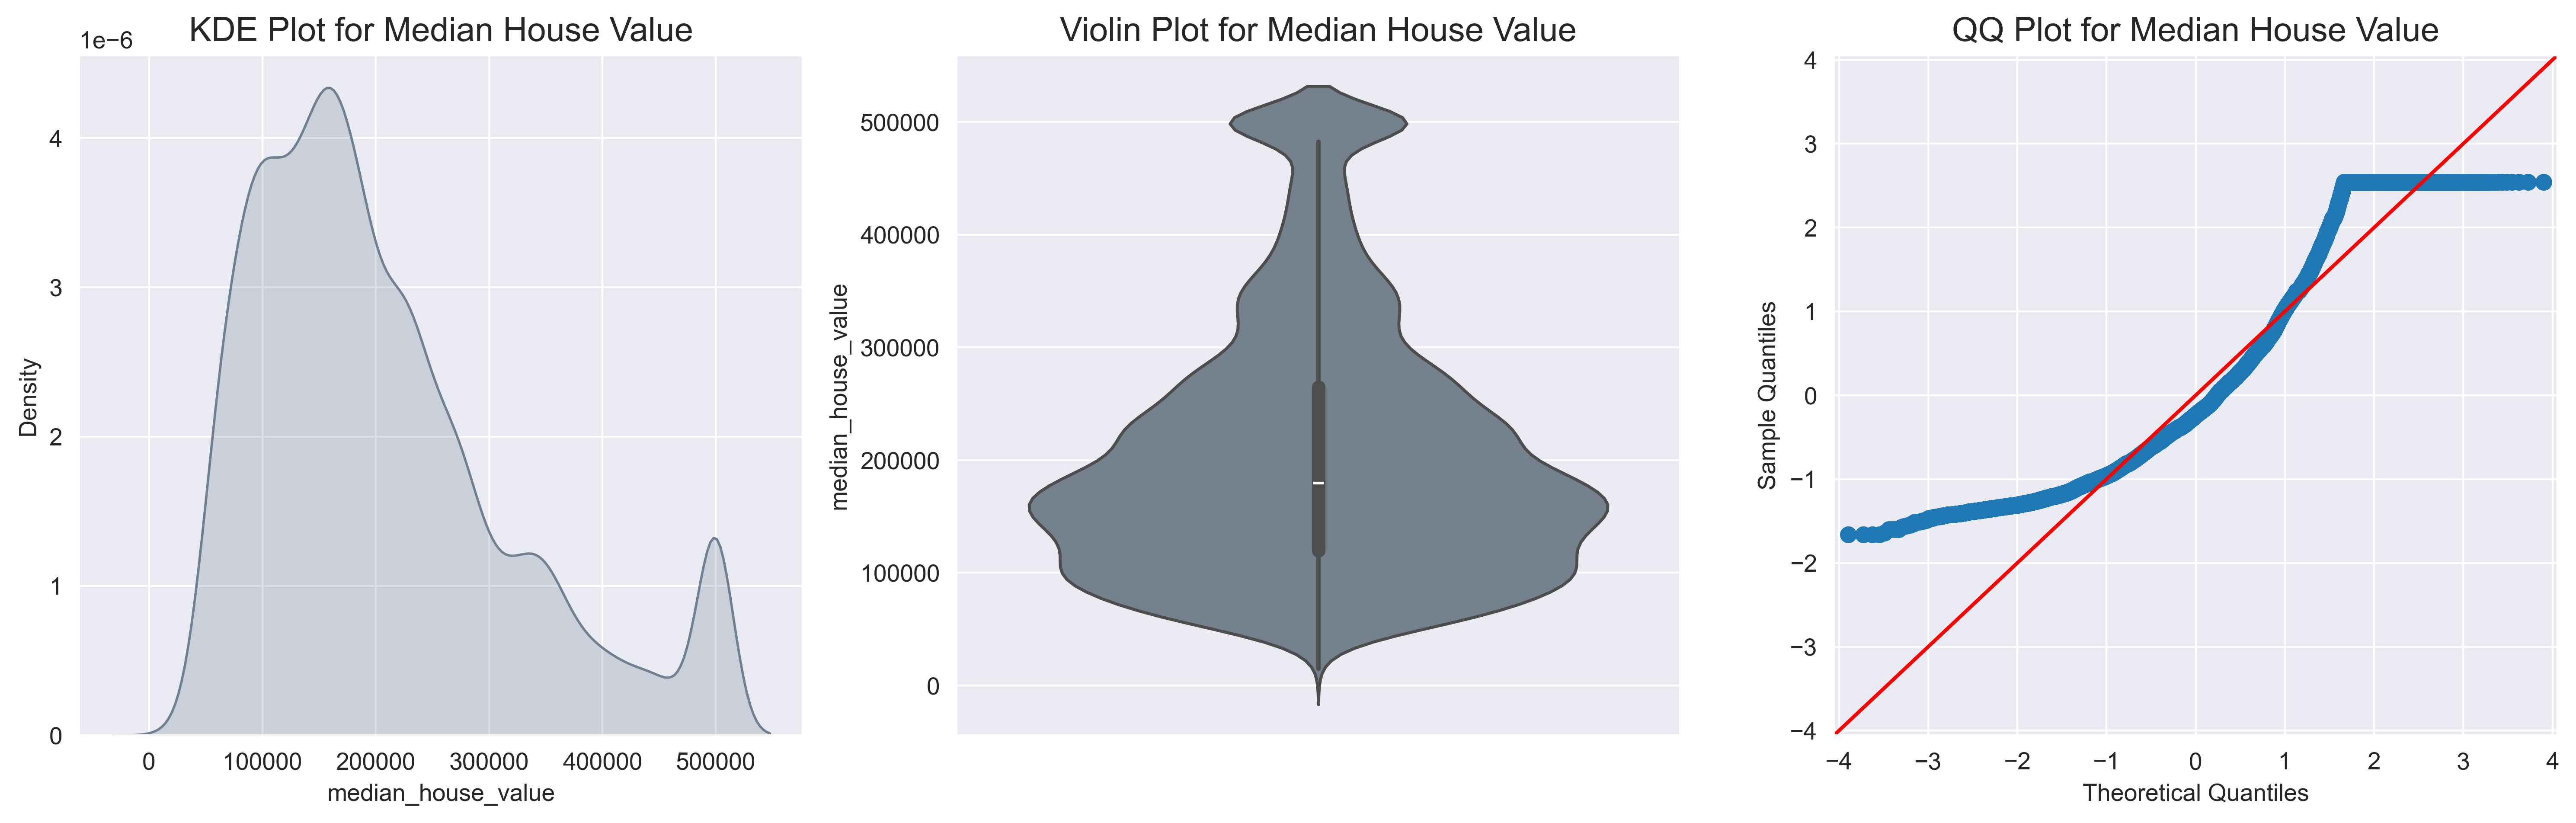

In [25]:

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# KDE Plot
sns.kdeplot(
    data=data['median_house_value'],
    fill=True,
    ax=ax[0],
    color="#708090"
).set_title("KDE Plot for Median House Value", fontsize=14)

# Violin Plot
sns.violinplot(
    y=data['median_house_value'],
    color="SlateGray",
    ax=ax[1]
).set_title("Violin Plot for Median House Value", fontsize=14)

# QQ Plot
sm.qqplot(
    data['median_house_value'],
    line='45',  
    fit=True,  
    marker='o',  
    ax=ax[2]

)
ax[2].set_title("QQ Plot for Median House Value", fontsize=14)
# Customize the color of points
ax[2].get_lines()[0].set_color('SlateGray')  # Change the QQ plot points to red

# Adjust layout and display
plt.tight_layout()
plt.show()

#### MULTI-COLLINEARITY

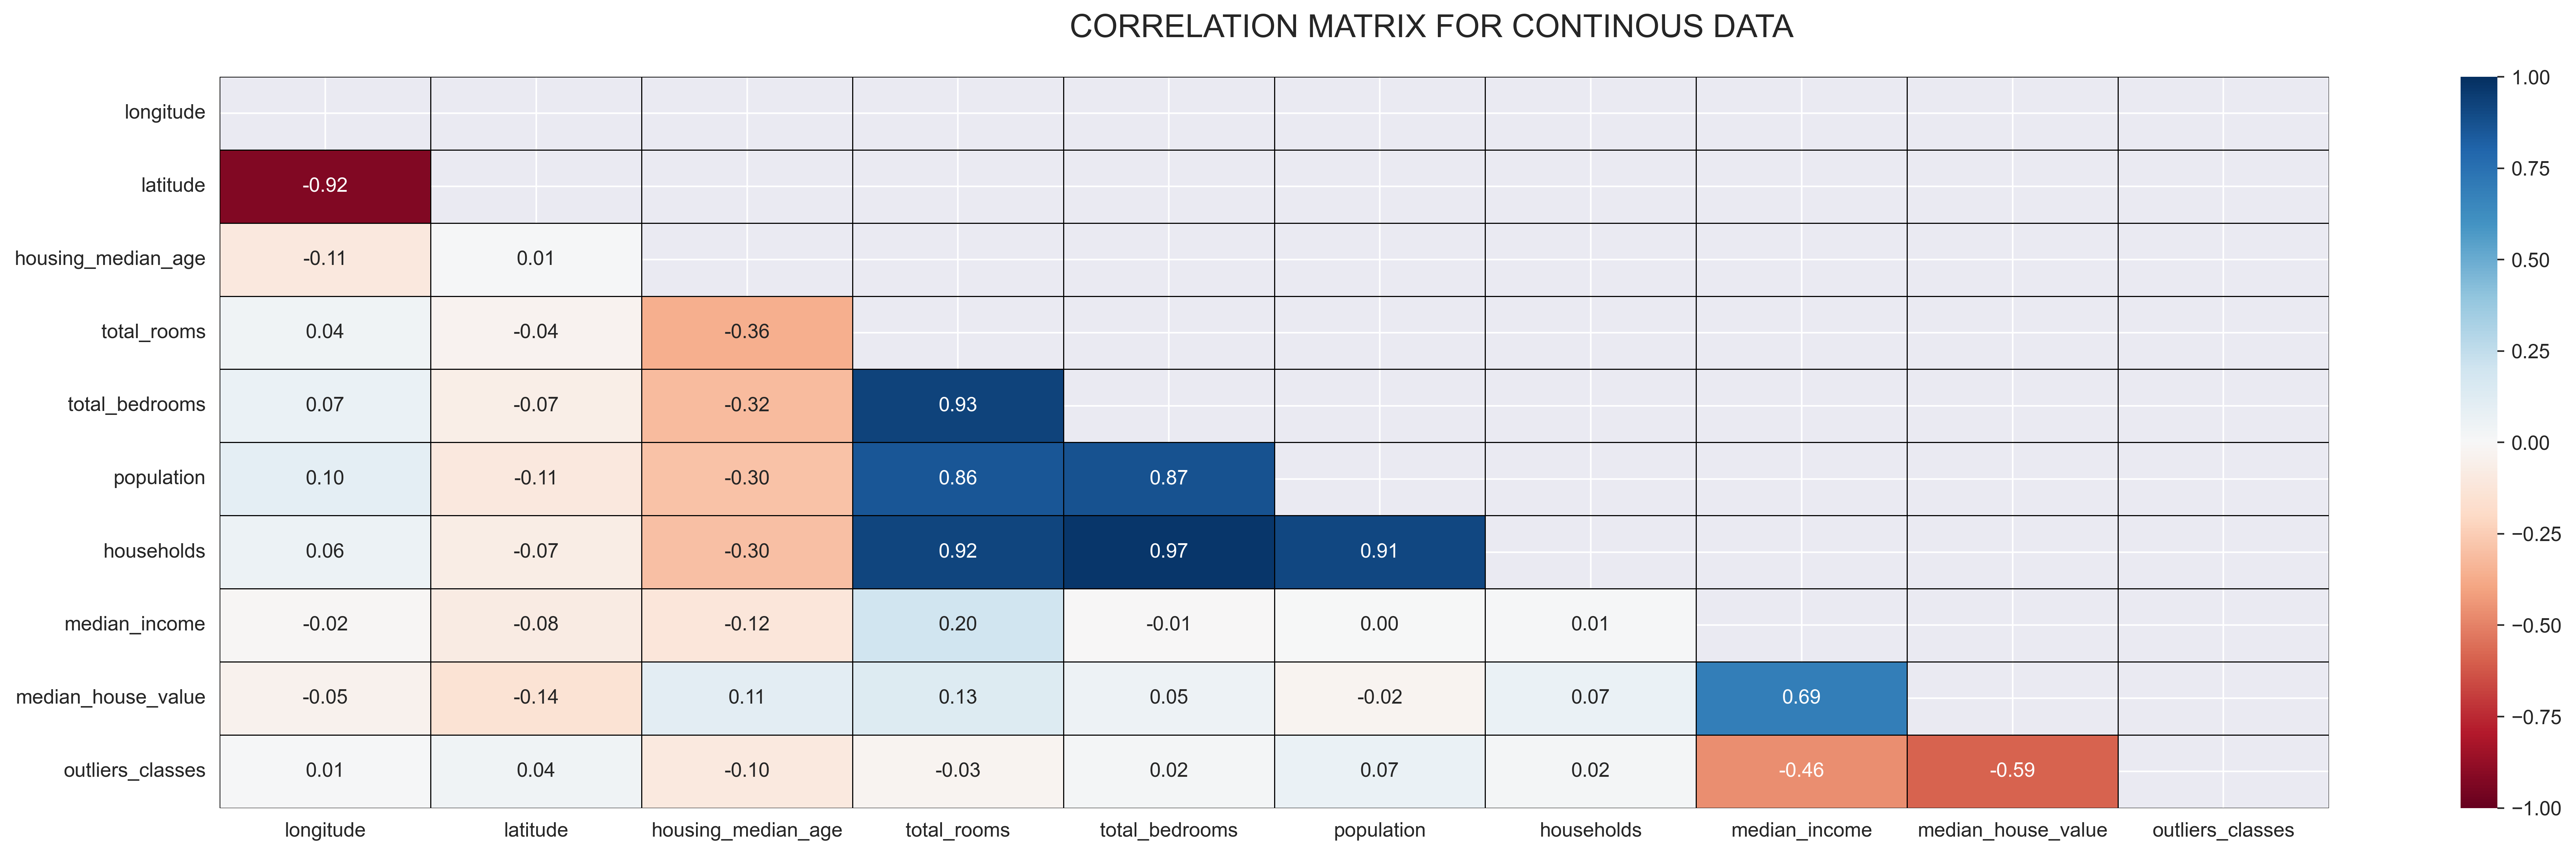

In [27]:
## using correlation heatmap  
mask = np.triu(np.ones_like(data.corr(numeric_only=True),dtype=bool))
## creating a heatmap 
sns.heatmap(data=data.corr(numeric_only=True),annot=True,fmt='.2f',mask=mask,linecolor="black",linewidths=0.5,cmap="RdBu",cbar=True,vmin=-1,vmax=1)
plt.suptitle("CORRELATION MATRIX FOR CONTINOUS DATA ",fontsize=16)
plt.tight_layout()
plt.show()

#### VARIANCE-INFLATION-FACTOR

In [29]:
# Select numeric features and exclude the target
x = data.loc[:, data.columns != 'median_house_value'].select_dtypes(include=['float', 'int'])
## add a constant to x  
x = sm.add_constant(x)
## passing x to the vif  
vif_values = [variance_inflation_factor(x.values ,i) for i in range(x.shape[1])]
## passing the dataframe  
vif_df = pd.DataFrame( 
    { 
    "Variiables":x.columns, 
    "VIF":vif_values
    }
)
## check the vif values
vif_df.sort_values(by='VIF',ascending=False)

Variiables           VIF
0               const  16672.599906
7          households     28.284827
5      total_bedrooms     27.166994
4         total_rooms     12.282906
2            latitude      8.831431
1           longitude      8.708994
6          population      6.292748
8       median_income      2.107382
9    outliers_classes      1.348172
3  housing_median_age      1.291576

In [30]:
## dropping some columns with high vif 
## 1.households
## 2.total_bedrooms
## 3.total_rooms
## latitude
data = data.drop(columns=['households','total_bedrooms','total_rooms','latitude','outliers_classes'])
## checking the remaining columns after dropping  
data.columns.to_list()

['longitude',
 'housing_median_age',
 'population',
 'median_income',
 'median_house_value',
 'ocean_proximity']

#### DATASET-SEPARATION

In [32]:
## numeric_data  
numeric_data = data.select_dtypes(include=['float','int'])
## categorical dat 
categorical_data = data.select_dtypes(include=['object'])

In [33]:
## dealing with numeric data 
pt = PowerTransformer(method='yeo-johnson')
## fit and transform the data  
numeric_data_transformed = pt.fit_transform(numeric_data)
## conerting back to the df  
numeric_data_transformed_df = pd.DataFrame(numeric_data_transformed , columns=numeric_data.columns , index=numeric_data.index)
## print the first five  
numeric_data_transformed_df.head()

longitude  housing_median_age  population  median_income  \
0 -2.414735e-15            0.975968   -1.619967       1.903289   
1 -2.414735e-15           -0.568893    1.090355       1.897081   
2 -2.414735e-15            1.761010   -1.139853       1.604361   
3 -2.414735e-15            1.761010   -1.000270       1.051321   
4 -2.414735e-15            1.761010   -0.985268       0.205878   

   median_house_value  
0            1.718078  
1            1.262941  
2            1.228314  
3            1.168611  
4            1.173649

In [34]:
## dealing with the categorical columns  
categorical_data_dummies_df = pd.get_dummies(categorical_data,drop_first=True).astype(int)
##  displaying the first five  
categorical_data_dummies_df.head()

ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [35]:
## concatinate  
final_df = pd.concat([numeric_data_transformed_df , categorical_data_dummies_df],axis=1)
## display the frst five  
final_df.head()

longitude  housing_median_age  population  median_income  \
0 -2.414735e-15            0.975968   -1.619967       1.903289   
1 -2.414735e-15           -0.568893    1.090355       1.897081   
2 -2.414735e-15            1.761010   -1.139853       1.604361   
3 -2.414735e-15            1.761010   -1.000270       1.051321   
4 -2.414735e-15            1.761010   -0.985268       0.205878   

   median_house_value  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0            1.718078                       0                       0   
1            1.262941                       0                       0   
2            1.228314                       0                       0   
3            1.168611                       0                       0   
4            1.173649                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0

In [36]:
## assiggning the target and features  
X = final_df.drop(columns=['median_house_value'])
y = final_df['median_house_value']


In [37]:
## first five X   
X.head()

longitude  housing_median_age  population  median_income  \
0 -2.414735e-15            0.975968   -1.619967       1.903289   
1 -2.414735e-15           -0.568893    1.090355       1.897081   
2 -2.414735e-15            1.761010   -1.139853       1.604361   
3 -2.414735e-15            1.761010   -1.000270       1.051321   
4 -2.414735e-15            1.761010   -0.985268       0.205878   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [38]:
y.head()

0    1.718078
1    1.262941
2    1.228314
3    1.168611
4    1.173649
Name: median_house_value, dtype: float64

#### Train Test Split

In [39]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
## print the shapes   
print(f'The number of shape of X train is,{X_train.shape}')
print(f'The shape of y train is {y_train.shape} ')
print(f'The number of shape of X test is,{X_test.shape}')
print(f'The shape of y test  is {y_test.shape} ')

The number of shape of X train is,(16512, 8)
The shape of y train is (16512,) 
The number of shape of X test is,(4128, 8)
The shape of y test  is (4128,) 


#### OLS-ESTIMATION

In [41]:
## Intialize ols  
model_1 = sm.OLS(y_train , sm.add_constant(X_train)).fit()
## call summary resuls  
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     4060.
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:31:43   Log-Likelihood:                -15164.
No. Observations:               16512   AIC:                         3.034e+04
Df Residuals:                   16504   BIC:                         3.041e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Run-the-Breush-Pagan-Test

In [43]:

# the function gives out four outputs
lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(model_1.resid, model_1.model.exog)

# Setting significance level
alpha = 0.05

# Printing the test results 
print("Breusch-Pagan Test Results:")
print(f"Lagrange Multiplier (LM) Statistic: {lm_stat:.3f}")
print(f"LM p-value: {lm_p_value:.3f}")
print(f"F-statistic: {f_stat:.3f}")
print(f"F-test p-value: {f_p_value:.3f}")
print()

# Checking  for heteroskedasticity based on the LM test p-value
if lm_p_value < alpha:
    print("Heteroskedasticity detected: The null hypothesis of homoskedasticity is rejected.")
else:
    print("No heteroskedasticity detected: The null hypothesis of homoskedasticity is not rejected.")


Breusch-Pagan Test Results:
Lagrange Multiplier (LM) Statistic: 862.410
LM p-value: 0.000
F-statistic: 129.928
F-test p-value: 0.000

Heteroskedasticity detected: The null hypothesis of homoskedasticity is rejected.


### Apply Correction of Errors & Re-Run Breush-Pagan-Test

In [45]:

# Fit the OLS model
model_2 = sm.OLS(y_train, sm.add_constant(X_train)).fit(cov_type='HC3')

# Print the summary of the model.
print(model_2.summary())

# run the Breusch-Pagan test to check for heteroskedasticity.
lm_stat, lm_p_value, f_stat, f_p_value = het_breuschpagan(model_2.resid, model_2.model.exog)
print("\nBreusch-Pagan Test Results:")
print(f"Lagrange Multiplier (LM) Statistic: {lm_stat:.3f}")
print(f"LM p-value: {lm_p_value:.3f}")
print(f"F-statistic: {f_stat:.3f}")
print(f"F-test p-value: {f_p_value:.3f}")

if lm_p_value < 0.05:
    print("Heteroskedasticity detected: The null hypothesis of homoskedasticity is rejected.")
else:
    print("No heteroskedasticity detected: The null hypothesis of homoskedasticity is not rejected.")


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     35.32
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.85e-09
Time:                        16:31:49   Log-Likelihood:                -15164.
No. Observations:               16512   AIC:                         3.034e+04
Df Residuals:                   16504   BIC:                         3.041e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

d:\tong\jt\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '


### Evaluation Process

In [47]:
## intialize thee preidction parameter  
y_pred = model_1.predict(sm.add_constant(X_test))
## evalue 
print(f"The Root Mean Squared Error is = {np.round(root_mean_squared_error(y_test,y_pred),3)}")


The Root Mean Squared Error is = 0.612


### THE-GAUSS-MARKOV-ASSUMPTIONS

In [49]:
data.sketch.ask("Hey, I need an HTML title display called 'Assumption 1: Linearity in parameters' It should be the left, in white, using Arial font,font-size:20px  and standalone for my report. Provide only the HTML code for the title."
)

#### Assumption 1: Linearity-in-parameters

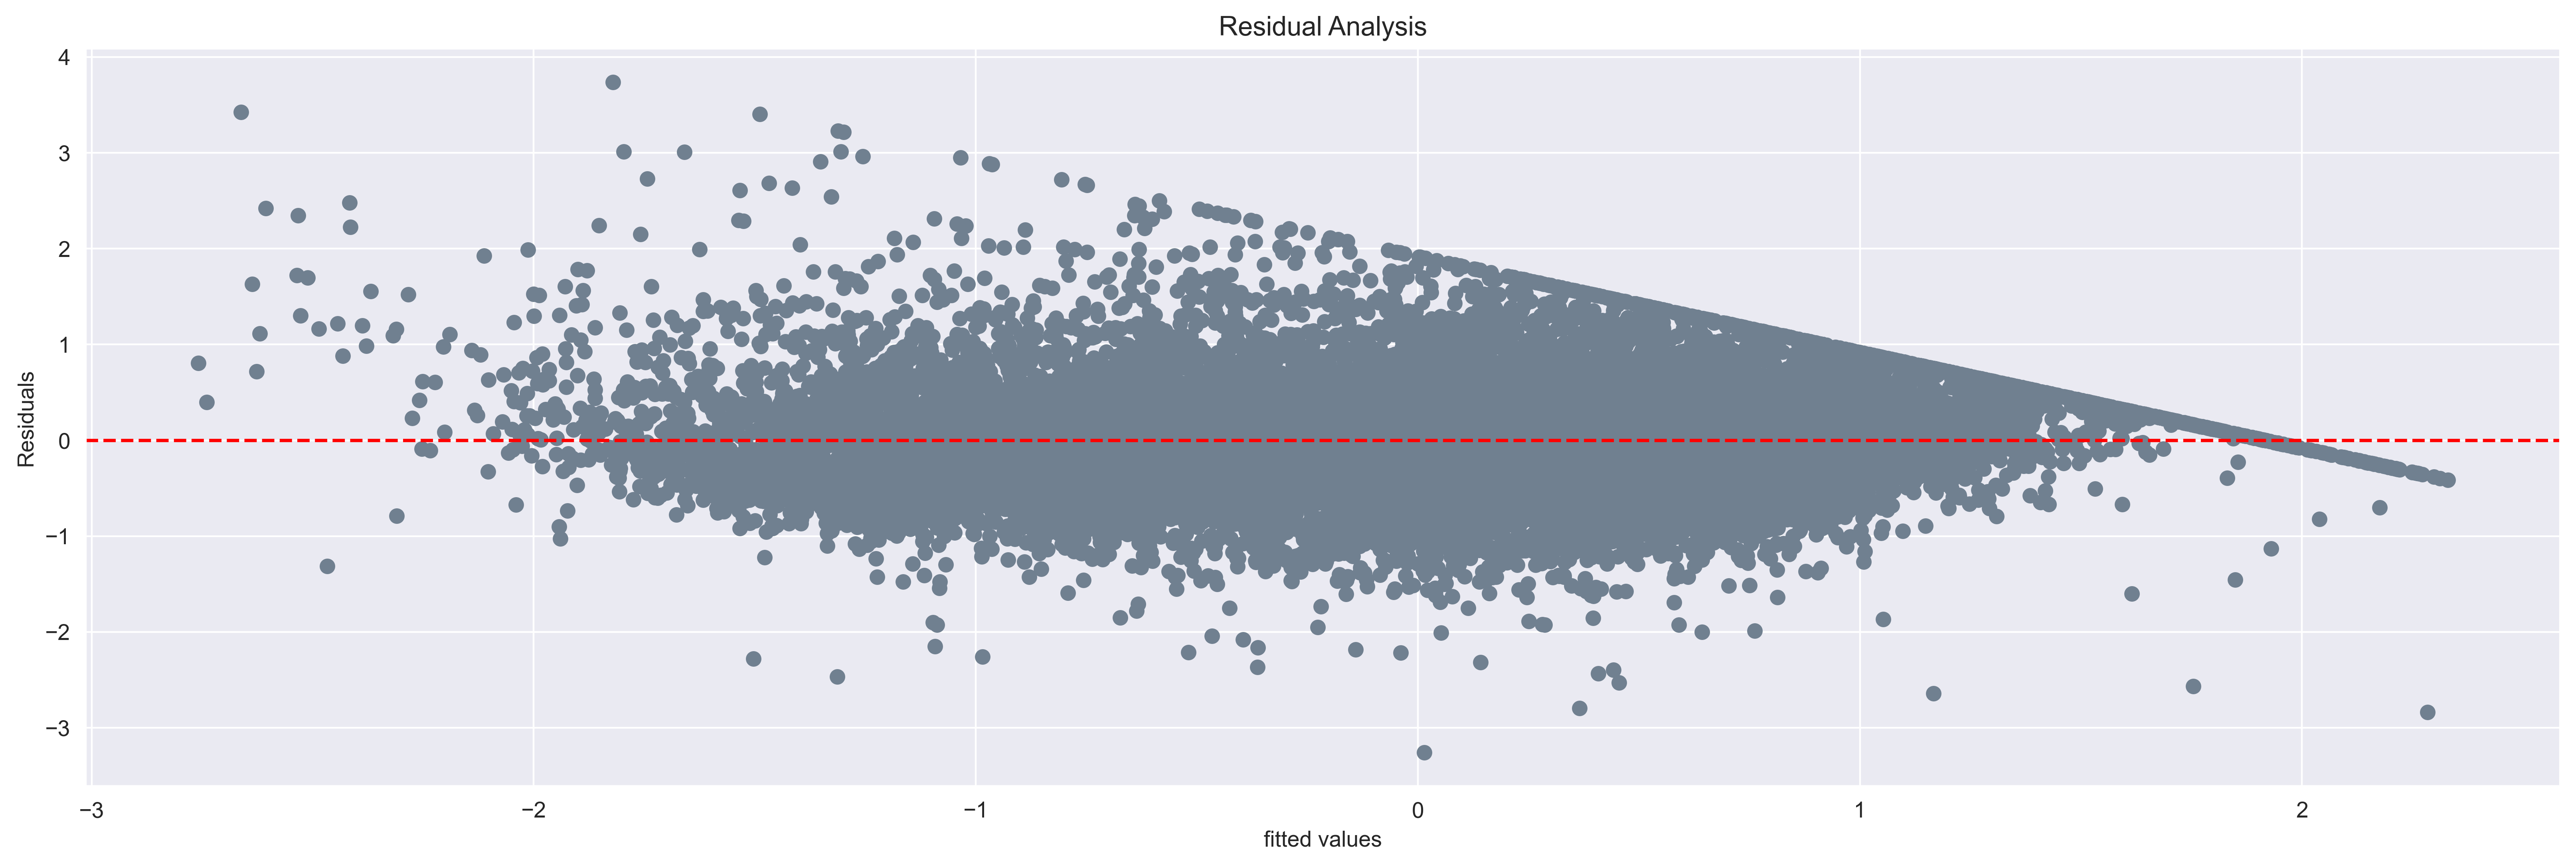

In [50]:
## Linearity in Parameters assumption  
plt.scatter(model_1.fittedvalues,model_1.resid,color='SlateGray')
plt.axhline(y=0,color='red',linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("fitted values")
plt.ylabel("Residuals")
plt.show()

#### Visualize-to-understand-pattern-shape

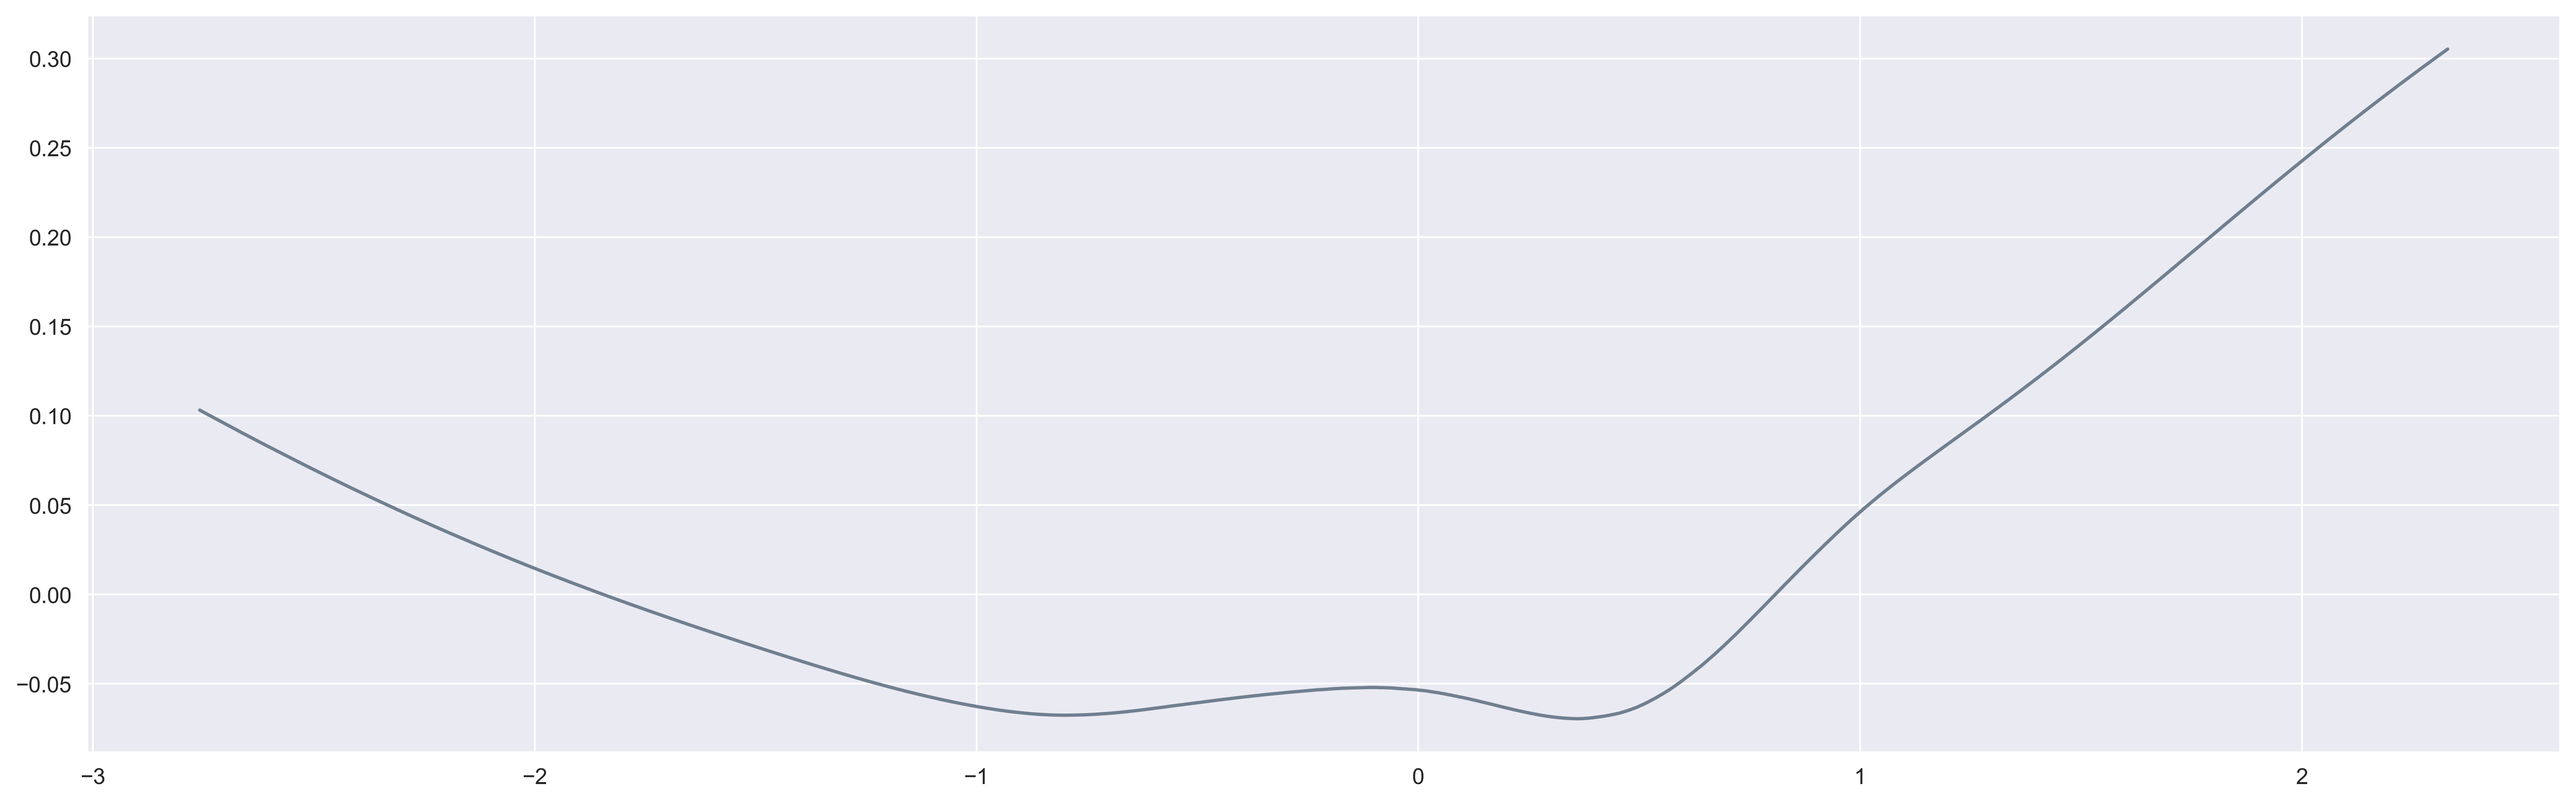

In [52]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(model_1.resid, model_1.fittedvalues)
plt.plot(lowess[:, 0], lowess[:, 1], color='SlateGray')
plt.show()

#### Assumption 2: Random-Sampling

In [54]:
## The Random Sampling Assumption  
from statsmodels.sandbox.stats.runs import runstest_1samp

# Flatten the DataFrame to a 1-dimensional array
data_1 = X_test.values.flatten()

# Run the test
statistic, p_value = runstest_1samp(data_1)

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: The data does not appear to be randomly sampled.")
else:
    print("Fail to reject the null hypothesis: The data appears to be randomly sampled.")

Reject the null hypothesis: The data does not appear to be randomly sampled.


#### Assumption 3: No-Perfect-Collinearity



In [56]:
## No perfect Mutli collineaiy using rank of a matrix
rank = np.linalg.matrix_rank(X)
if rank < X.shape[1]:
    print("Perfect multicollinearity detected.")
else:
    print("No perfect multicollinearity.")

Perfect multicollinearity detected.


#### Assumption 4: Zero-Conditional-Mean

In [58]:
## Zero Mean Conditional mean assumption  
residuals = model_1.resid 
for variable in X_train.columns:  
    corr_coeff = np.corrcoef(residuals, X_train[variable])[0,1]
    print(f"Correlation between residuals and {variable} : {np.round(corr_coeff,3)} ") 

Correlation between residuals and longitude : 0.001 
Correlation between residuals and housing_median_age : -0.002 
Correlation between residuals and population : 0.005 
Correlation between residuals and median_income : -0.003 
Correlation between residuals and ocean_proximity_INLAND : 0.0 
Correlation between residuals and ocean_proximity_ISLAND : -0.0 
Correlation between residuals and ocean_proximity_NEAR BAY : -0.002 
Correlation between residuals and ocean_proximity_NEAR OCEAN : 0.001 


In [59]:
# import matplotlib.pyplot as plt
# for variable in X_train.columns:
#     plt.scatter(X_train[variable], residuals, alpha=0.5)
#     plt.axhline(0, color='red', linestyle='--')
#     plt.xlabel(variable)
#     plt.ylabel('Residuals')
#     plt.title(f'Residuals vs {variable}')
#     plt.show()

#### Assumption 5: Homoskedasticity

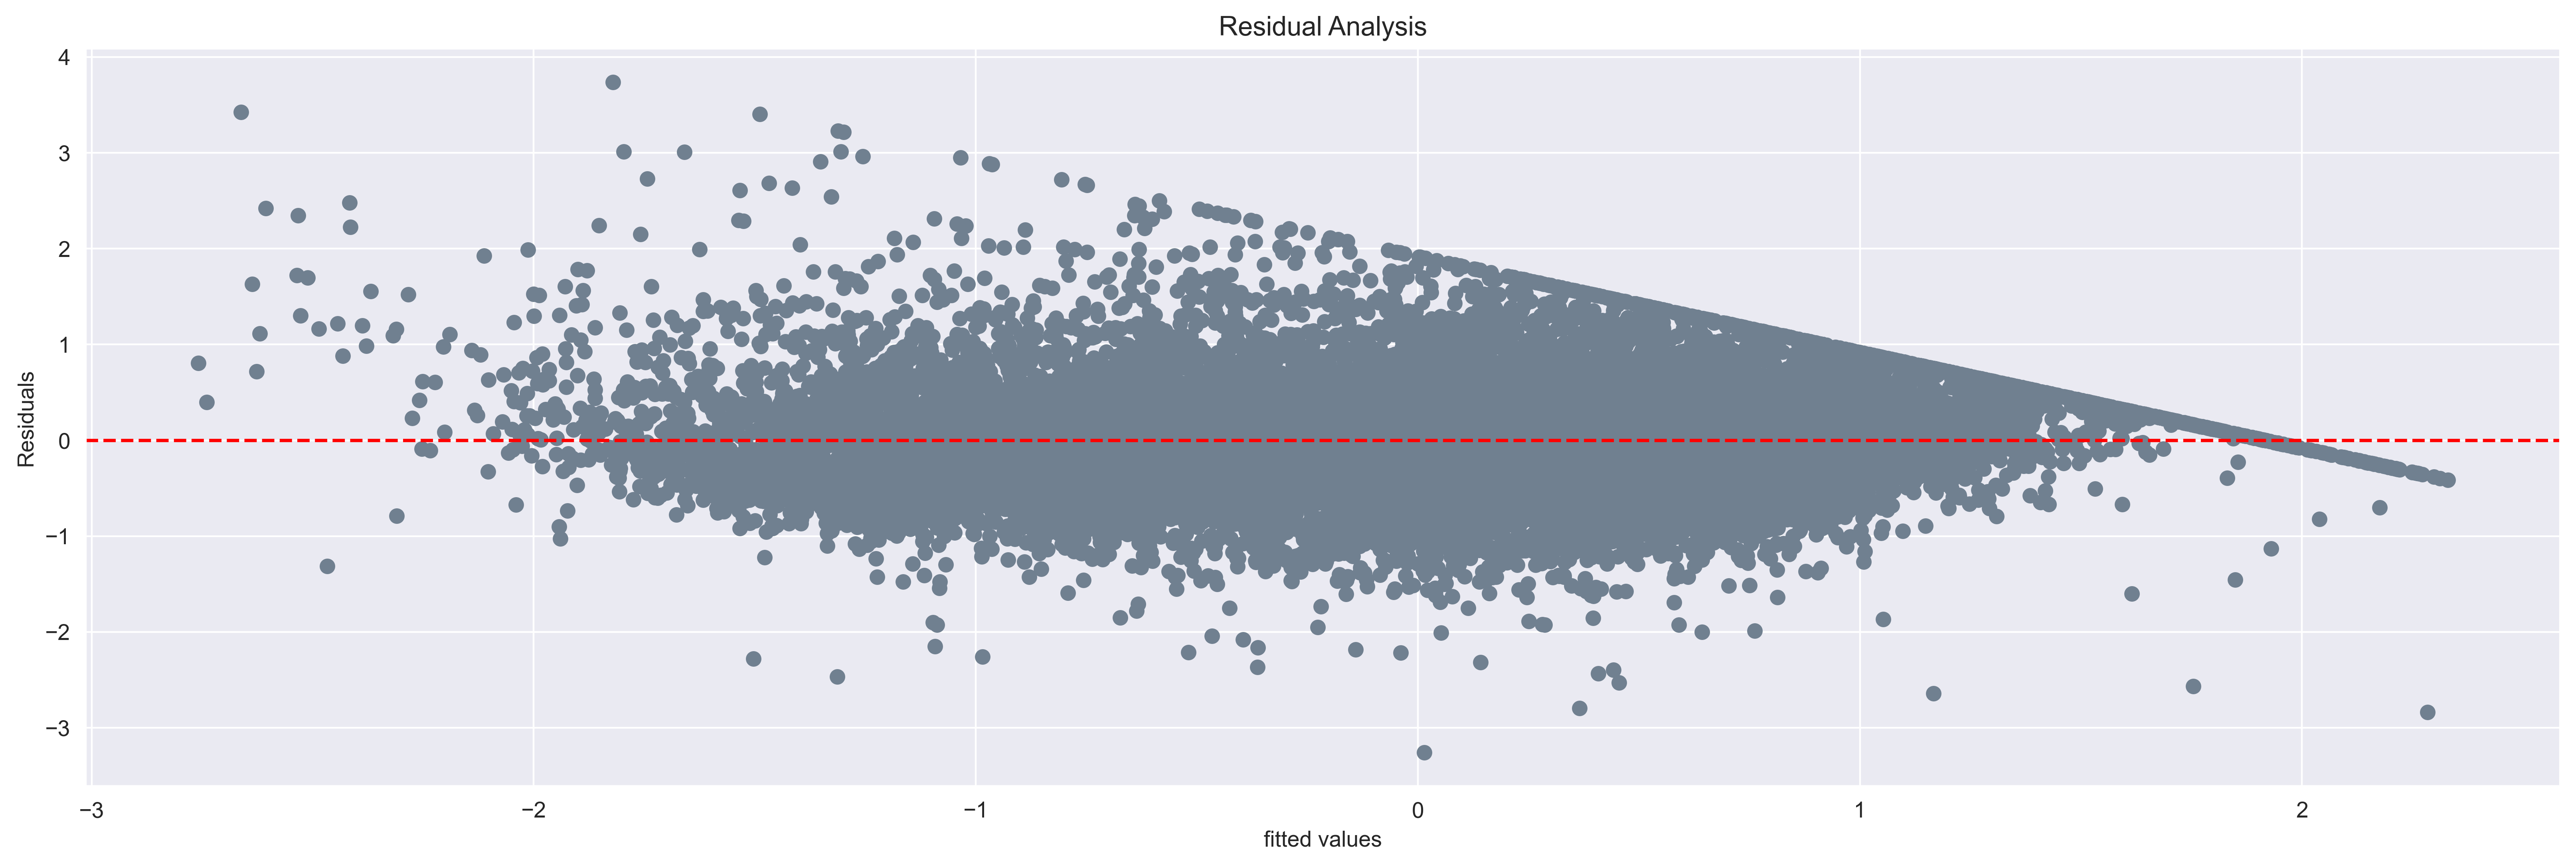

In [77]:
## Linearity in Parameters assumption  
plt.scatter(model_1.fittedvalues,model_1.resid,color='SlateGray')
plt.axhline(y=0,color='red',linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("fitted values")
plt.ylabel("Residuals")
plt.show()

#### Assumption 6: Normality-of-Residuals

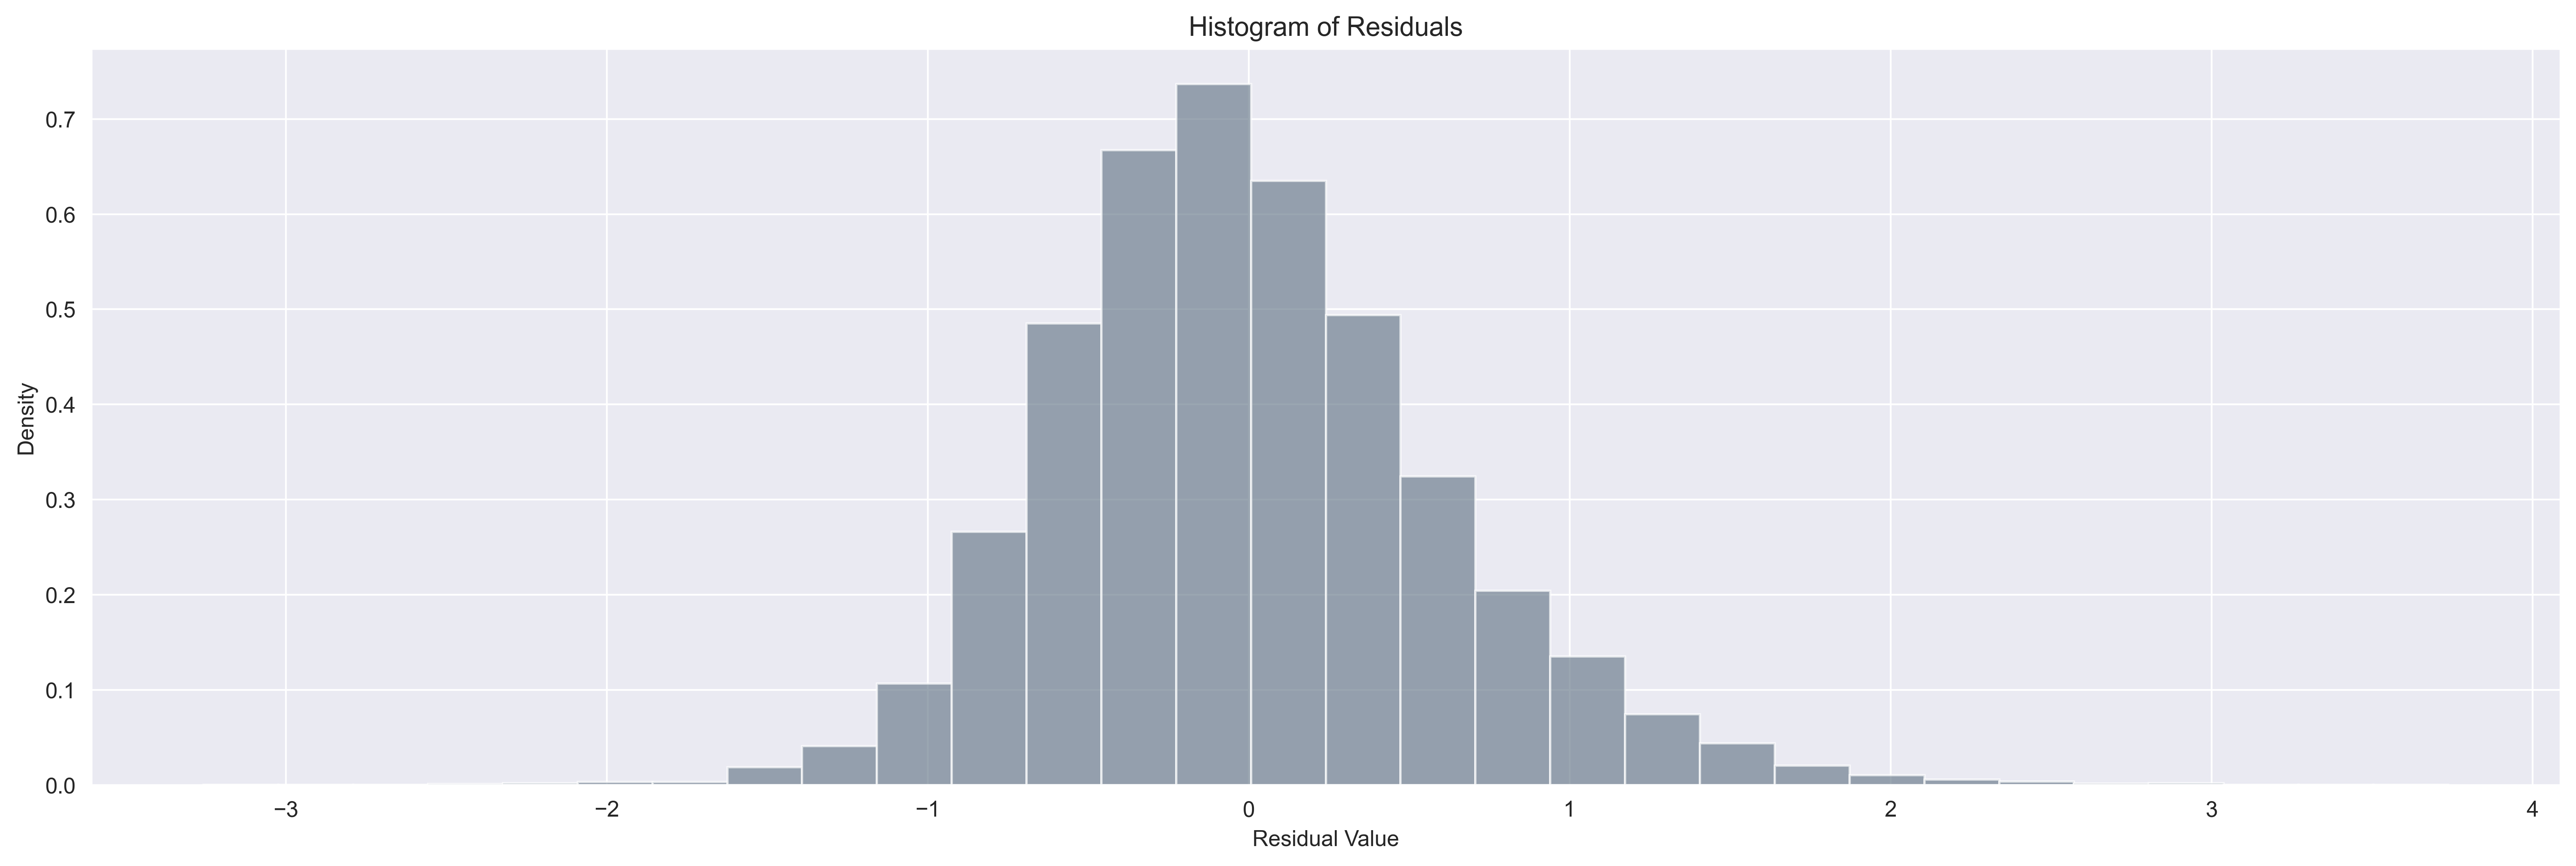

In [63]:
import matplotlib.pyplot as plt
plt.hist(model_1.resid, bins=30, density=True, alpha=0.7, color='SlateGray')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.show()

## MACHINE-LEARNING-BASED-APPROACH

##### Ridge-Regression

In [66]:
## Intialzie the Ridge class 
ridge_reg = Ridge(alpha=1)
## fit the model with data 
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [67]:
## make preeedictions 
ridge_predictions = ridge_reg.predict(X_test)

In [68]:
## Evaluate  
rmse = root_mean_squared_error(y_test,y_pred)
## print the rmse  
print(f"The Root Mean Squared Error is {rmse:.3f}")

The Root Mean Squared Error is 0.612


#### Linear-Regression

In [70]:
## intialize the linear regression class  
lr =  LinearRegression()
## fit the Model 
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
## make predictions  
lr_predictions = lr.predict(X_test)
## rmse 
rmse_lr = root_mean_squared_error(y_test ,lr_predictions)
## print  
print(f"The Root Mean Squared Error is {rmse_lr:.3f}")

The Root Mean Squared Error is 0.612


#### Xgboost

In [73]:
## intialize the xgboost class  
xgboost = XGBRFRegressor()
## FIT 
xgboost.fit(X_train ,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [74]:
## preditions  
xgboost_predictions = xgboost.predict(X_test)
## Evaluate 
rmse_xgb= root_mean_squared_error(y_test,xgboost_predictions)
## print  
print(f"The Root Mean Squared Error is {rmse_xgb:.3f}")

The Root Mean Squared Error is 0.553


### SHAP-FOR-FEATURE-IMPORTANCE

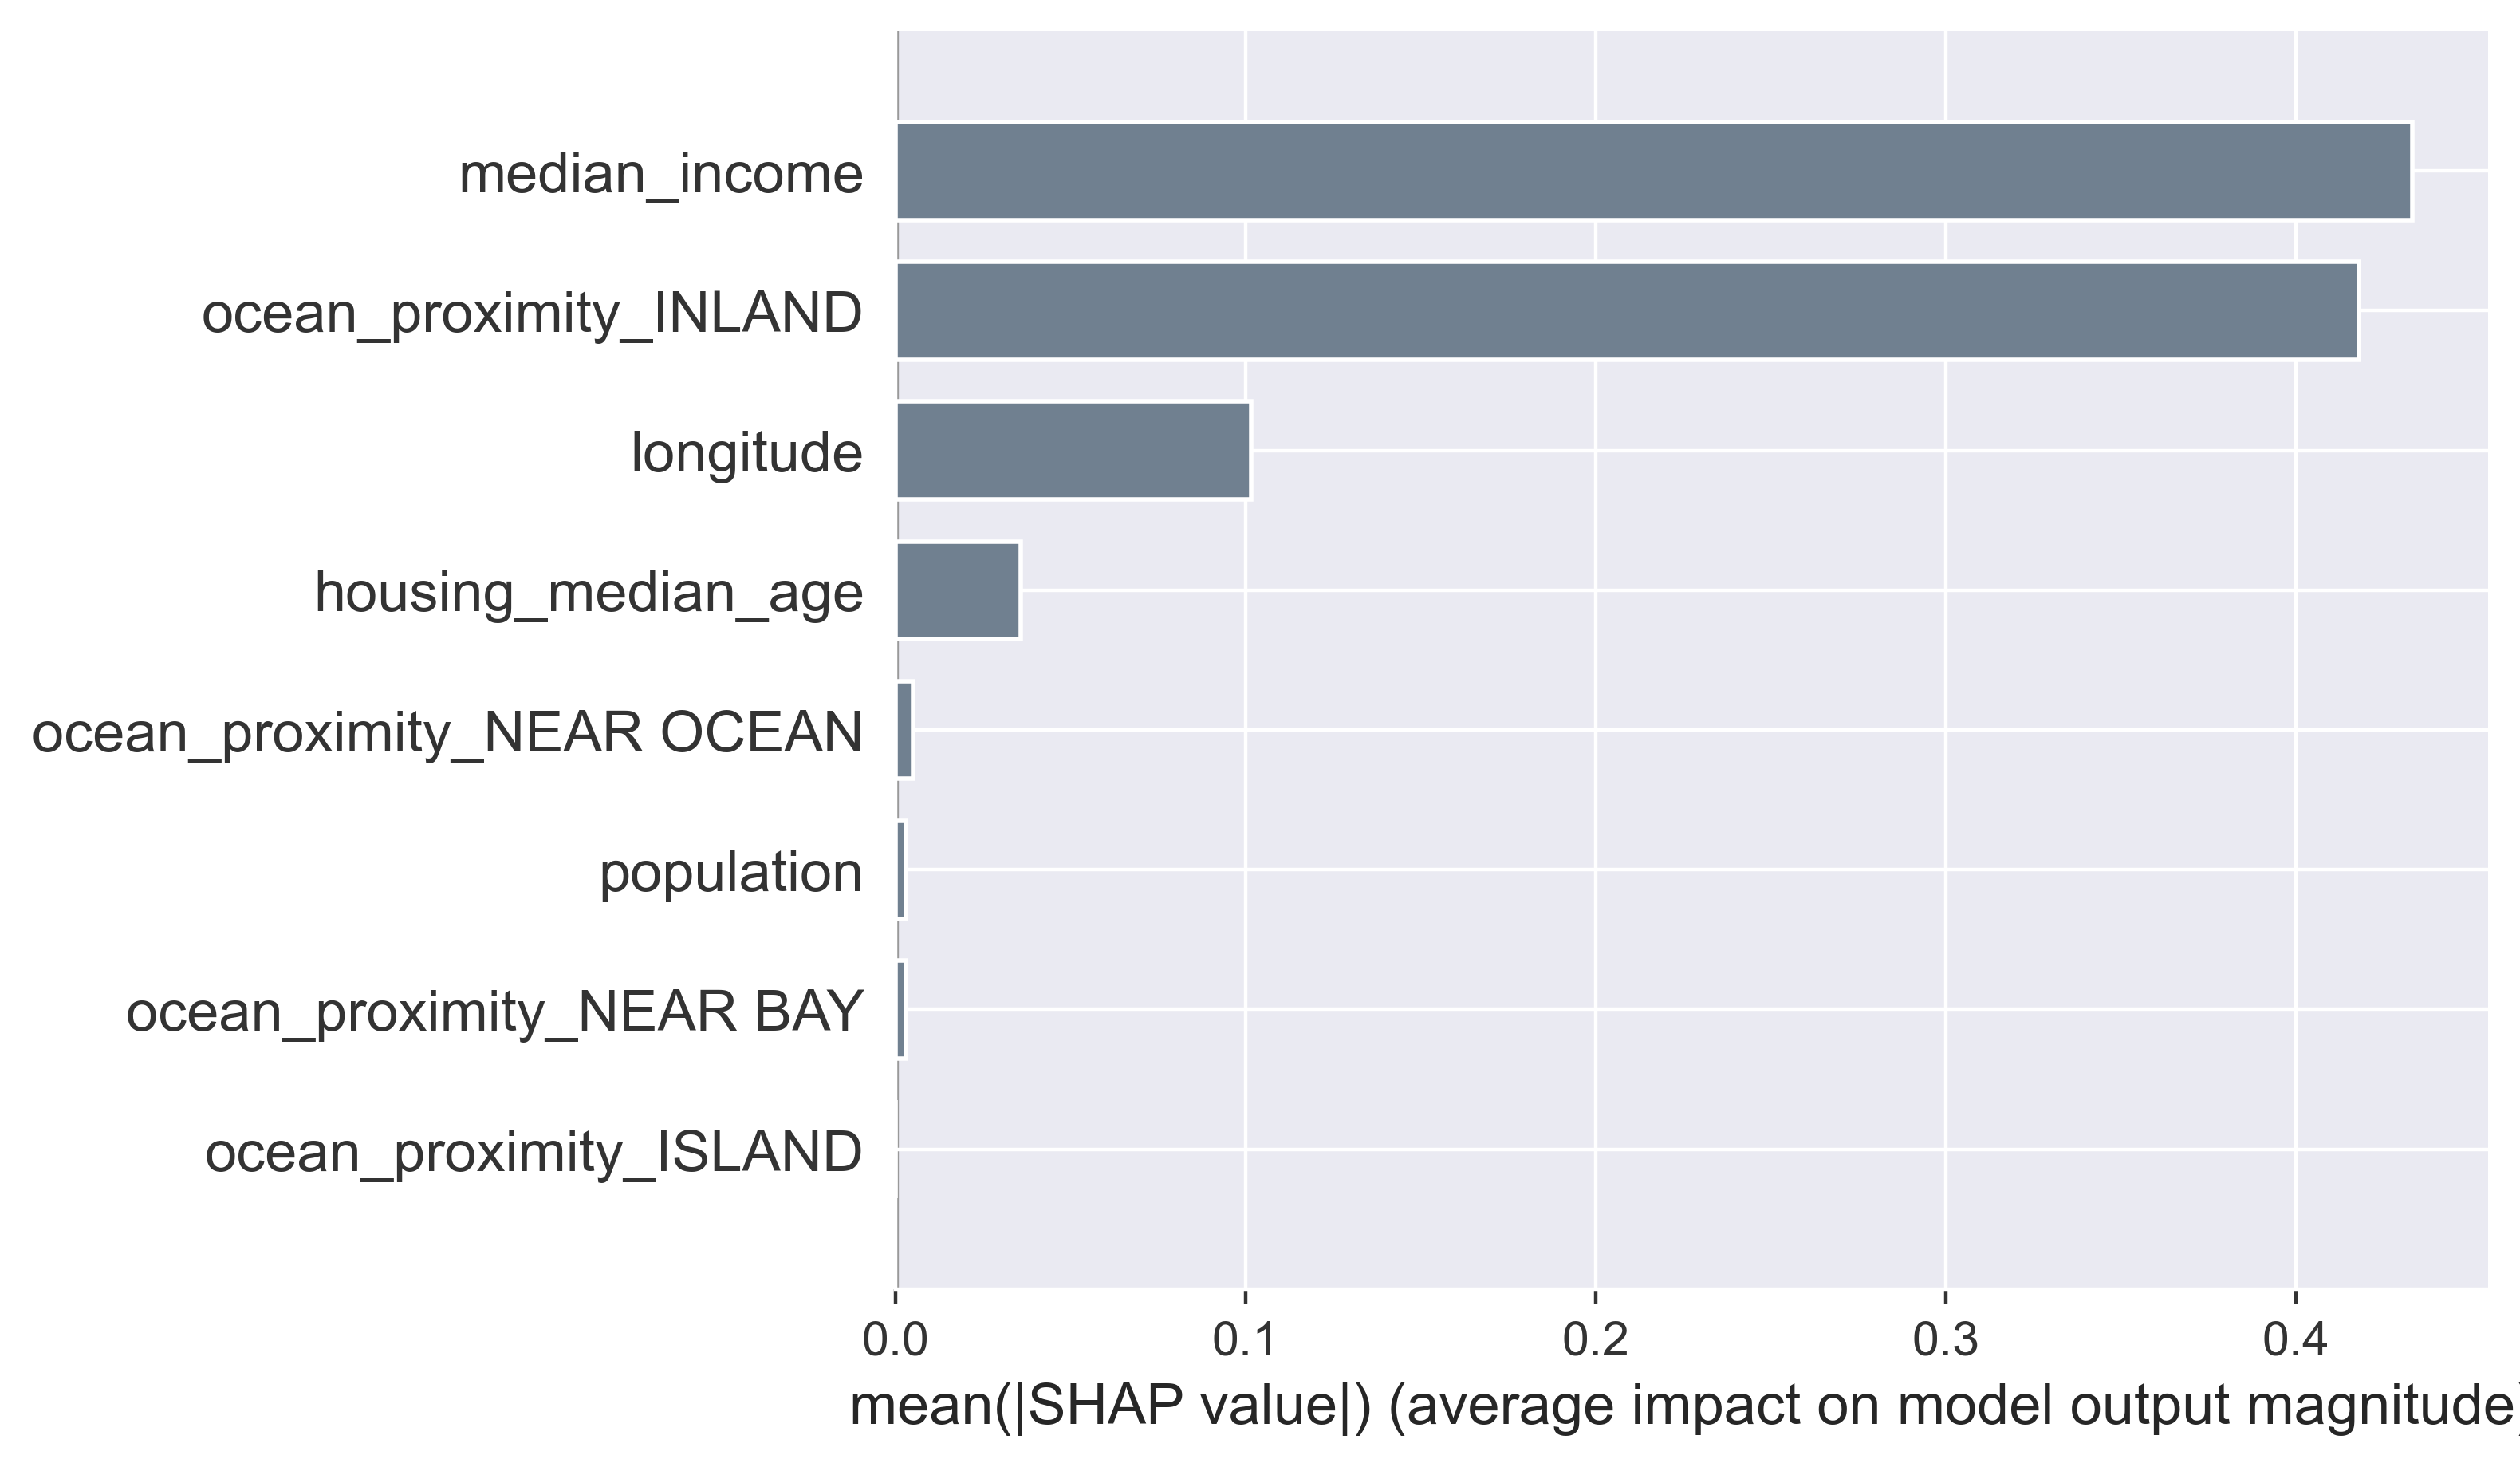

In [76]:

import shap
explainer = shap.TreeExplainer(xgboost) 
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",color="SlateGray")
